In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import spacy

from matplotlib.pyplot import imread
from wordcloud import wordcloud, STOPWORDS
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
re=requests.get('https://www.amazon.in/Gradient-Waterproof-Backpack-Capacity-Computer/dp/B07YDC1P5M/ref=sr_1_38?crid=3S7W5JQD9VE4Y&keywords=bts&qid=1676025618&sprefix=bts%2Caps%2C339&sr=8-38#customerReviews')
header=re.headers
header

{'Server': 'Server', 'Content-Type': 'text/html', 'x-amz-rid': '44B25SZH0ECCHJ8XP7G7', 'Last-Modified': 'Wed, 01 Feb 2023 06:15:13 GMT', 'ETag': '"503-5f39d5f02fe40-gzip"', 'Accept-Ranges': 'bytes', 'Content-Encoding': 'gzip', 'Cache-Control': 'no-transform', 'Strict-Transport-Security': 'max-age=47474747; includeSubDomains; preload', 'Content-Length': '705', 'Date': 'Fri, 10 Feb 2023 11:15:33 GMT', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding'}

In [ ]:
from requests.api import request
from bs4 import BeautifulSoup

def  getdata(url):
  r=requests.get(url,headers=header)
  return r.text


def html_code(url):
  htmldata=getdata(url)
  soup=BeautifulSoup(htmldata,'html.parser')
  return (soup)


url="https://www.amazon.in/Gradient-Waterproof-Backpack-Capacity-Computer/dp/B07YDC1P5M/ref=sr_1_38?crid=3S7W5JQD9VE4Y&keywords=bts&qid=1676025618&sprefix=bts%2Caps%2C339&sr=8-38#customerReviews"

soup=html_code(url)
soup

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<!-- sp:end-feature:csm:head-open-part2 -->
<!-- sp:feature:aui-assets -->
<link href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41tGz3DNCrL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11Qjwq-j69L.css,01Dm5eKVxw

In [ ]:
def cus_data(soup):

  data_str=" "
  cus_list=[]

  for item in soup.find_all('span',class_="a-profile-name"):
    data_str=data_str + item.get_text()
    cus_list.append(data_str)
    data_str=" "
  return cus_list


cus_res=cus_data(soup)
cus_res

[' Amazon Customer',
 ' Akshitha',
 ' Divyajyothi Gaddala',
 ' Divyajyothi Gaddala',
 ' Ammu',
 ' Ammu',
 ' Samir',
 ' Peehu Sharna and her family',
 ' Yamini',
 ' Aruna Kumari',
 ' M. Naveena']

In [ ]:
def cus_rev(soup):
	# find the Html tag
	# with find()
	# and convert into string
	data_str = ""

	for item in soup.find_all("div", class_="a-row a-spacing-small review-data"):
		data_str = data_str + item.get_text()

	result = data_str.split("\n")
	return (result)


rev_data = cus_rev(soup)
rev_result = []
for i in rev_data:
	if i is "":
		pass
	else:
		rev_result.append(i)
rev_result


<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-14-5b67529a91be>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is "":


["It's cute and sweet and short. Quality 3.5/5.",
 'Read more',
 '                    The media could not be loaded.',
 '                ',
 '\xa0Quality is good and very comfyLooking cute and small but have much space for big books',
 'Read more',
 "It's a nice one🙂 but the thing is....it can only fit for kg students not for school students who loaded with books 📚 and notes, but it's perfect for me. If you're college student , carrying minimum amount of materials then go for it quality is awesome 💜",
 'Read more',
 '                    The media could not be loaded.',
 '                ',
 '\xa0Damaged bag,quality also not good',
 'Read more',
 '                    The media could not be loaded.',
 '                ',
 '\xa0Th8s is beautiful nice for all kids and teenagers i like it',
 'Read more',
 "I liked the bag cloth it's really so nice but please check the size of the bag. I thought it will be big but it's kinda smaller than I expected. Still it's really cute BTS bag with bunny 

In [ ]:
import pandas as pd 
data = pd.DataFrame( rev_result,columns=["review"] )
data.index[3]

3

In [ ]:
data

,review
0,It's cute and sweet and short. Quality 3.5/5.
1,Read more
2,The media could not be loa...
3,
4,Quality is good and very comfyLooking cute an...
5,Read more
6,It's a nice one🙂 but the thing is....it can on...
7,Read more
8,The media could not be loa...
9,


In [ ]:
data.drop([1,3,5,7,9,11,13,15,17,19,21],axis=0,inplace=True)

In [ ]:
data.reset_index(drop=True)


,review
0,It's cute and sweet and short. Quality 3.5/5.
1,The media could not be loa...
2,Quality is good and very comfyLooking cute an...
3,It's a nice one🙂 but the thing is....it can on...
4,The media could not be loa...
5,"Damaged bag,quality also not good"
6,The media could not be loa...
7,Th8s is beautiful nice for all kids and teena...
8,I liked the bag cloth it's really so nice but ...
9,My child BTS Army buy it Waterproof bag thank...


In [ ]:
data.shape

(11, 1)

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.columns

Index(['review'], dtype='object')

In [ ]:
df=[Text.strip() for Text in df.review]
df

["It's cute and sweet and short. Quality 3.5/5.",
 'The media could not be loaded.',
 'Quality is good and very comfyLooking cute and small but have much space for big books',
 "It's a nice one🙂 but the thing is....it can only fit for kg students not for school students who loaded with books 📚 and notes, but it's perfect for me. If you're college student , carrying minimum amount of materials then go for it quality is awesome 💜",
 'The media could not be loaded.',
 'Damaged bag,quality also not good',
 'The media could not be loaded.',
 'Th8s is beautiful nice for all kids and teenagers i like it',
 "I liked the bag cloth it's really so nice but please check the size of the bag. I thought it will be big but it's kinda smaller than I expected. Still it's really cute BTS bag with bunny hears",
 'My child BTS Army buy it  Waterproof bag thank you Amazon 👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼',
 'Nice material']

In [ ]:
df=[Text for Text in df if Text]
df

["It's cute and sweet and short. Quality 3.5/5.",
 'The media could not be loaded.',
 'Quality is good and very comfyLooking cute and small but have much space for big books',
 "It's a nice one🙂 but the thing is....it can only fit for kg students not for school students who loaded with books 📚 and notes, but it's perfect for me. If you're college student , carrying minimum amount of materials then go for it quality is awesome 💜",
 'The media could not be loaded.',
 'Damaged bag,quality also not good',
 'The media could not be loaded.',
 'Th8s is beautiful nice for all kids and teenagers i like it',
 "I liked the bag cloth it's really so nice but please check the size of the bag. I thought it will be big but it's kinda smaller than I expected. Still it's really cute BTS bag with bunny hears",
 'My child BTS Army buy it  Waterproof bag thank you Amazon 👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼',
 'Nice material']

In [ ]:
# Joining the list into one string
df_text=" ".join(tw)
df_text

"It's cute and sweet and short. Quality 3.5/5. The media could not be loaded. Quality is good and very comfyLooking cute and small but have much space for big books It's a nice one🙂 but the thing is....it can only fit for kg students not for school students who loaded with books 📚 and notes, but it's perfect for me. If you're college student , carrying minimum amount of materials then go for it quality is awesome 💜 The media could not be loaded. Damaged bag,quality also not good The media could not be loaded. Th8s is beautiful nice for all kids and teenagers i like it I liked the bag cloth it's really so nice but please check the size of the bag. I thought it will be big but it's kinda smaller than I expected. Still it's really cute BTS bag with bunny hears My child BTS Army buy it  Waterproof bag thank you Amazon 👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼 Nice material"

In [ ]:
# remove punctuations
no_punc_text=df_text.translate(str.maketrans(" "," ",string.punctuation))
no_punc_text

'Its cute and sweet and short Quality 355 The media could not be loaded Quality is good and very comfyLooking cute and small but have much space for big books Its a nice one🙂 but the thing isit can only fit for kg students not for school students who loaded with books 📚 and notes but its perfect for me If youre college student  carrying minimum amount of materials then go for it quality is awesome 💜 The media could not be loaded Damaged bagquality also not good The media could not be loaded Th8s is beautiful nice for all kids and teenagers i like it I liked the bag cloth its really so nice but please check the size of the bag I thought it will be big but its kinda smaller than I expected Still its really cute BTS bag with bunny hears My child BTS Army buy it  Waterproof bag thank you Amazon 👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼 Nice material'

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
text_tokens

['Its',
 'cute',
 'and',
 'sweet',
 'and',
 'short',
 'Quality',
 '355',
 'The',
 'media',
 'could',
 'not',
 'be',
 'loaded',
 'Quality',
 'is',
 'good',
 'and',
 'very',
 'comfyLooking',
 'cute',
 'and',
 'small',
 'but',
 'have',
 'much',
 'space',
 'for',
 'big',
 'books',
 'Its',
 'a',
 'nice',
 'one🙂',
 'but',
 'the',
 'thing',
 'isit',
 'can',
 'only',
 'fit',
 'for',
 'kg',
 'students',
 'not',
 'for',
 'school',
 'students',
 'who',
 'loaded',
 'with',
 'books',
 '📚',
 'and',
 'notes',
 'but',
 'its',
 'perfect',
 'for',
 'me',
 'If',
 'youre',
 'college',
 'student',
 'carrying',
 'minimum',
 'amount',
 'of',
 'materials',
 'then',
 'go',
 'for',
 'it',
 'quality',
 'is',
 'awesome',
 '💜',
 'The',
 'media',
 'could',
 'not',
 'be',
 'loaded',
 'Damaged',
 'bagquality',
 'also',
 'not',
 'good',
 'The',
 'media',
 'could',
 'not',
 'be',
 'loaded',
 'Th8s',
 'is',
 'beautiful',
 'nice',
 'for',
 'all',
 'kids',
 'and',
 'teenagers',
 'i',
 'like',
 'it',
 'I',
 'liked',
 'the'

In [ ]:
# tokens count
len(text_tokens)

159

In [ ]:
# remove stopwords
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
sw=['💜','👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼','📚','one🙂','Th8s','I']
stop_words.extend(sw)

no_sw_tokens=[word for word in text_tokens if not word in stop_words]
no_sw_tokens

['Its',
 'cute',
 'sweet',
 'short',
 'Quality',
 '355',
 'The',
 'media',
 'could',
 'loaded',
 'Quality',
 'good',
 'comfyLooking',
 'cute',
 'small',
 'much',
 'space',
 'big',
 'books',
 'Its',
 'nice',
 'thing',
 'isit',
 'fit',
 'kg',
 'students',
 'school',
 'students',
 'loaded',
 'books',
 'notes',
 'perfect',
 'If',
 'youre',
 'college',
 'student',
 'carrying',
 'minimum',
 'amount',
 'materials',
 'go',
 'quality',
 'awesome',
 'The',
 'media',
 'could',
 'loaded',
 'Damaged',
 'bagquality',
 'also',
 'good',
 'The',
 'media',
 'could',
 'loaded',
 'beautiful',
 'nice',
 'kids',
 'teenagers',
 'like',
 'liked',
 'bag',
 'cloth',
 'really',
 'nice',
 'please',
 'check',
 'size',
 'bag',
 'thought',
 'big',
 'kinda',
 'smaller',
 'expected',
 'Still',
 'really',
 'cute',
 'BTS',
 'bag',
 'bunny',
 'hears',
 'My',
 'child',
 'BTS',
 'Army',
 'buy',
 'Waterproof',
 'bag',
 'thank',
 'Amazon',
 'Nice',
 'material']

In [ ]:
# normalize the data 
lower_words=[Text.lower() for Text in no_sw_tokens]
lower_words

['its',
 'cute',
 'sweet',
 'short',
 'quality',
 '355',
 'the',
 'media',
 'could',
 'loaded',
 'quality',
 'good',
 'comfylooking',
 'cute',
 'small',
 'much',
 'space',
 'big',
 'books',
 'its',
 'nice',
 'thing',
 'isit',
 'fit',
 'kg',
 'students',
 'school',
 'students',
 'loaded',
 'books',
 'notes',
 'perfect',
 'if',
 'youre',
 'college',
 'student',
 'carrying',
 'minimum',
 'amount',
 'materials',
 'go',
 'quality',
 'awesome',
 'the',
 'media',
 'could',
 'loaded',
 'damaged',
 'bagquality',
 'also',
 'good',
 'the',
 'media',
 'could',
 'loaded',
 'beautiful',
 'nice',
 'kids',
 'teenagers',
 'like',
 'liked',
 'bag',
 'cloth',
 'really',
 'nice',
 'please',
 'check',
 'size',
 'bag',
 'thought',
 'big',
 'kinda',
 'smaller',
 'expected',
 'still',
 'really',
 'cute',
 'bts',
 'bag',
 'bunny',
 'hears',
 'my',
 'child',
 'bts',
 'army',
 'buy',
 'waterproof',
 'bag',
 'thank',
 'amazon',
 'nice',
 'material']

In [ ]:
# stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stem_tokens=[ps.stem(word) for word in lower_words]
stem_tokens

['it',
 'cute',
 'sweet',
 'short',
 'qualiti',
 '355',
 'the',
 'media',
 'could',
 'load',
 'qualiti',
 'good',
 'comfylook',
 'cute',
 'small',
 'much',
 'space',
 'big',
 'book',
 'it',
 'nice',
 'thing',
 'isit',
 'fit',
 'kg',
 'student',
 'school',
 'student',
 'load',
 'book',
 'note',
 'perfect',
 'if',
 'your',
 'colleg',
 'student',
 'carri',
 'minimum',
 'amount',
 'materi',
 'go',
 'qualiti',
 'awesom',
 'the',
 'media',
 'could',
 'load',
 'damag',
 'bagqual',
 'also',
 'good',
 'the',
 'media',
 'could',
 'load',
 'beauti',
 'nice',
 'kid',
 'teenag',
 'like',
 'like',
 'bag',
 'cloth',
 'realli',
 'nice',
 'pleas',
 'check',
 'size',
 'bag',
 'thought',
 'big',
 'kinda',
 'smaller',
 'expect',
 'still',
 'realli',
 'cute',
 'bt',
 'bag',
 'bunni',
 'hear',
 'my',
 'child',
 'bt',
 'armi',
 'buy',
 'waterproof',
 'bag',
 'thank',
 'amazon',
 'nice',
 'materi']

In [ ]:
# Lemmatization
nlp=spacy.load("en_core_web_sm")
doc=nlp(" ".join(lower_words))
doc

its cute sweet short quality 355 the media could loaded quality good comfylooking cute small much space big books its nice thing isit fit kg students school students loaded books notes perfect if youre college student carrying minimum amount materials go quality awesome the media could loaded damaged bagquality also good the media could loaded beautiful nice kids teenagers like liked bag cloth really nice please check size bag thought big kinda smaller expected still really cute bts bag bunny hears my child bts army buy waterproof bag thank amazon nice material

In [ ]:
lemmas=[token.lemma_ for token in doc]
lemmas

['its',
 'cute',
 'sweet',
 'short',
 'quality',
 '355',
 'the',
 'medium',
 'could',
 'load',
 'quality',
 'good',
 'comfylooking',
 'cute',
 'small',
 'much',
 'space',
 'big',
 'book',
 'its',
 'nice',
 'thing',
 'isit',
 'fit',
 'kg',
 'student',
 'school',
 'student',
 'load',
 'book',
 'note',
 'perfect',
 'if',
 'you',
 're',
 'college',
 'student',
 'carry',
 'minimum',
 'amount',
 'material',
 'go',
 'quality',
 'awesome',
 'the',
 'medium',
 'could',
 'load',
 'damaged',
 'bagquality',
 'also',
 'good',
 'the',
 'medium',
 'could',
 'load',
 'beautiful',
 'nice',
 'kid',
 'teenager',
 'like',
 'like',
 'bag',
 'cloth',
 'really',
 'nice',
 'please',
 'check',
 'size',
 'bag',
 'think',
 'big',
 'kinda',
 'small',
 'expect',
 'still',
 'really',
 'cute',
 'bts',
 'bag',
 'bunny',
 'hear',
 'my',
 'child',
 'bts',
 'army',
 'buy',
 'waterproof',
 'bag',
 'thank',
 'amazon',
 'nice',
 'material']

In [ ]:
clean_df=" ".join(lemmas)
clean_df

'its cute sweet short quality 355 the medium could load quality good comfylooking cute small much space big book its nice thing isit fit kg student school student load book note perfect if you re college student carry minimum amount material go quality awesome the medium could load damaged bagquality also good the medium could load beautiful nice kid teenager like like bag cloth really nice please check size bag think big kinda small expect still really cute bts bag bunny hear my child bts army buy waterproof bag thank amazon nice material'

Feature Extraction

Using CountVectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
df_cv=cv.fit_transform(lemmas)
cv.vocabulary_

{'its': 30,
 'cute': 21,
 'sweet': 55,
 'short': 49,
 'quality': 45,
 '355': 0,
 'the': 58,
 'medium': 37,
 'could': 20,
 'load': 35,
 'good': 26,
 'comfylooking': 19,
 'small': 51,
 'much': 39,
 'space': 52,
 'big': 9,
 'book': 10,
 'nice': 41,
 'thing': 59,
 'isit': 29,
 'fit': 24,
 'kg': 31,
 'student': 54,
 'school': 48,
 'note': 42,
 'perfect': 43,
 'if': 28,
 'you': 62,
 're': 46,
 'college': 18,
 'carry': 14,
 'minimum': 38,
 'amount': 3,
 'material': 36,
 'go': 25,
 'awesome': 5,
 'damaged': 22,
 'bagquality': 7,
 'also': 1,
 'beautiful': 8,
 'kid': 32,
 'teenager': 56,
 'like': 34,
 'bag': 6,
 'cloth': 17,
 'really': 47,
 'please': 44,
 'check': 15,
 'size': 50,
 'think': 60,
 'kinda': 33,
 'expect': 23,
 'still': 53,
 'bts': 11,
 'bunny': 12,
 'hear': 27,
 'my': 40,
 'child': 16,
 'army': 4,
 'buy': 13,
 'waterproof': 61,
 'thank': 57,
 'amazon': 2}

In [ ]:
cv.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['355',
 'also',
 'amazon',
 'amount',
 'army',
 'awesome',
 'bag',
 'bagquality',
 'beautiful',
 'big',
 'book',
 'bts',
 'bunny',
 'buy',
 'carry',
 'check',
 'child',
 'cloth',
 'college',
 'comfylooking',
 'could',
 'cute',
 'damaged',
 'expect',
 'fit',
 'go',
 'good',
 'hear',
 'if',
 'isit',
 'its',
 'kg',
 'kid',
 'kinda',
 'like',
 'load',
 'material',
 'medium',
 'minimum',
 'much',
 'my',
 'nice',
 'note',
 'perfect',
 'please',
 'quality',
 're',
 'really',
 'school',
 'short',
 'size',
 'small',
 'space',
 'still',
 'student',
 'sweet',
 'teenager',
 'thank',
 'the',
 'thing',
 'think',
 'waterproof',
 'you']

In [ ]:
df_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
df_cv.toarray().shape

(93, 63)

CountVectorization with N-grams (Bigram and Trigram)

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)


In [ ]:
cv_ngram_range.get_feature_names()

['355',
 'also',
 'amazon',
 'amount',
 'army',
 'awesome',
 'bag',
 'bagquality',
 'beautiful',
 'big',
 'book',
 'bts',
 'bunny',
 'buy',
 'carry',
 'check',
 'child',
 'cloth',
 'college',
 'comfylooking',
 'could',
 'cute',
 'damaged',
 'expect',
 'fit',
 'go',
 'good',
 'hear',
 'if',
 'isit',
 'its',
 'kg',
 'kid',
 'kinda',
 'like',
 'load',
 'material',
 'medium',
 'minimum',
 'much',
 'my',
 'nice',
 'note',
 'perfect',
 'please',
 'quality',
 're',
 'really',
 'school',
 'short',
 'size',
 'small',
 'space',
 'still',
 'student',
 'sweet',
 'teenager',
 'thank',
 'the',
 'thing',
 'think',
 'waterproof',
 'you']

In [ ]:
bow_matrix_ngram.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ngram_mf=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tf_idf_matrix_ngram=tf_idf_ngram_mf.fit_transform(lemmas)

In [ ]:
tf_idf_ngram_mf.get_feature_names()

['355',
 'also',
 'amazon',
 'amount',
 'army',
 'awesome',
 'bag',
 'bagquality',
 'beautiful',
 'big',
 'book',
 'bts',
 'bunny',
 'buy',
 'carry',
 'check',
 'child',
 'cloth',
 'college',
 'comfylooking',
 'could',
 'cute',
 'damaged',
 'expect',
 'fit',
 'go',
 'good',
 'hear',
 'if',
 'isit',
 'its',
 'kg',
 'kid',
 'kinda',
 'like',
 'load',
 'material',
 'medium',
 'minimum',
 'much',
 'my',
 'nice',
 'note',
 'perfect',
 'please',
 'quality',
 're',
 'really',
 'school',
 'short',
 'size',
 'small',
 'space',
 'still',
 'student',
 'sweet',
 'teenager',
 'thank',
 'the',
 'thing',
 'think',
 'waterproof',
 'you']

In [ ]:
tf_idf_matrix_ngram.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Generate word cloud

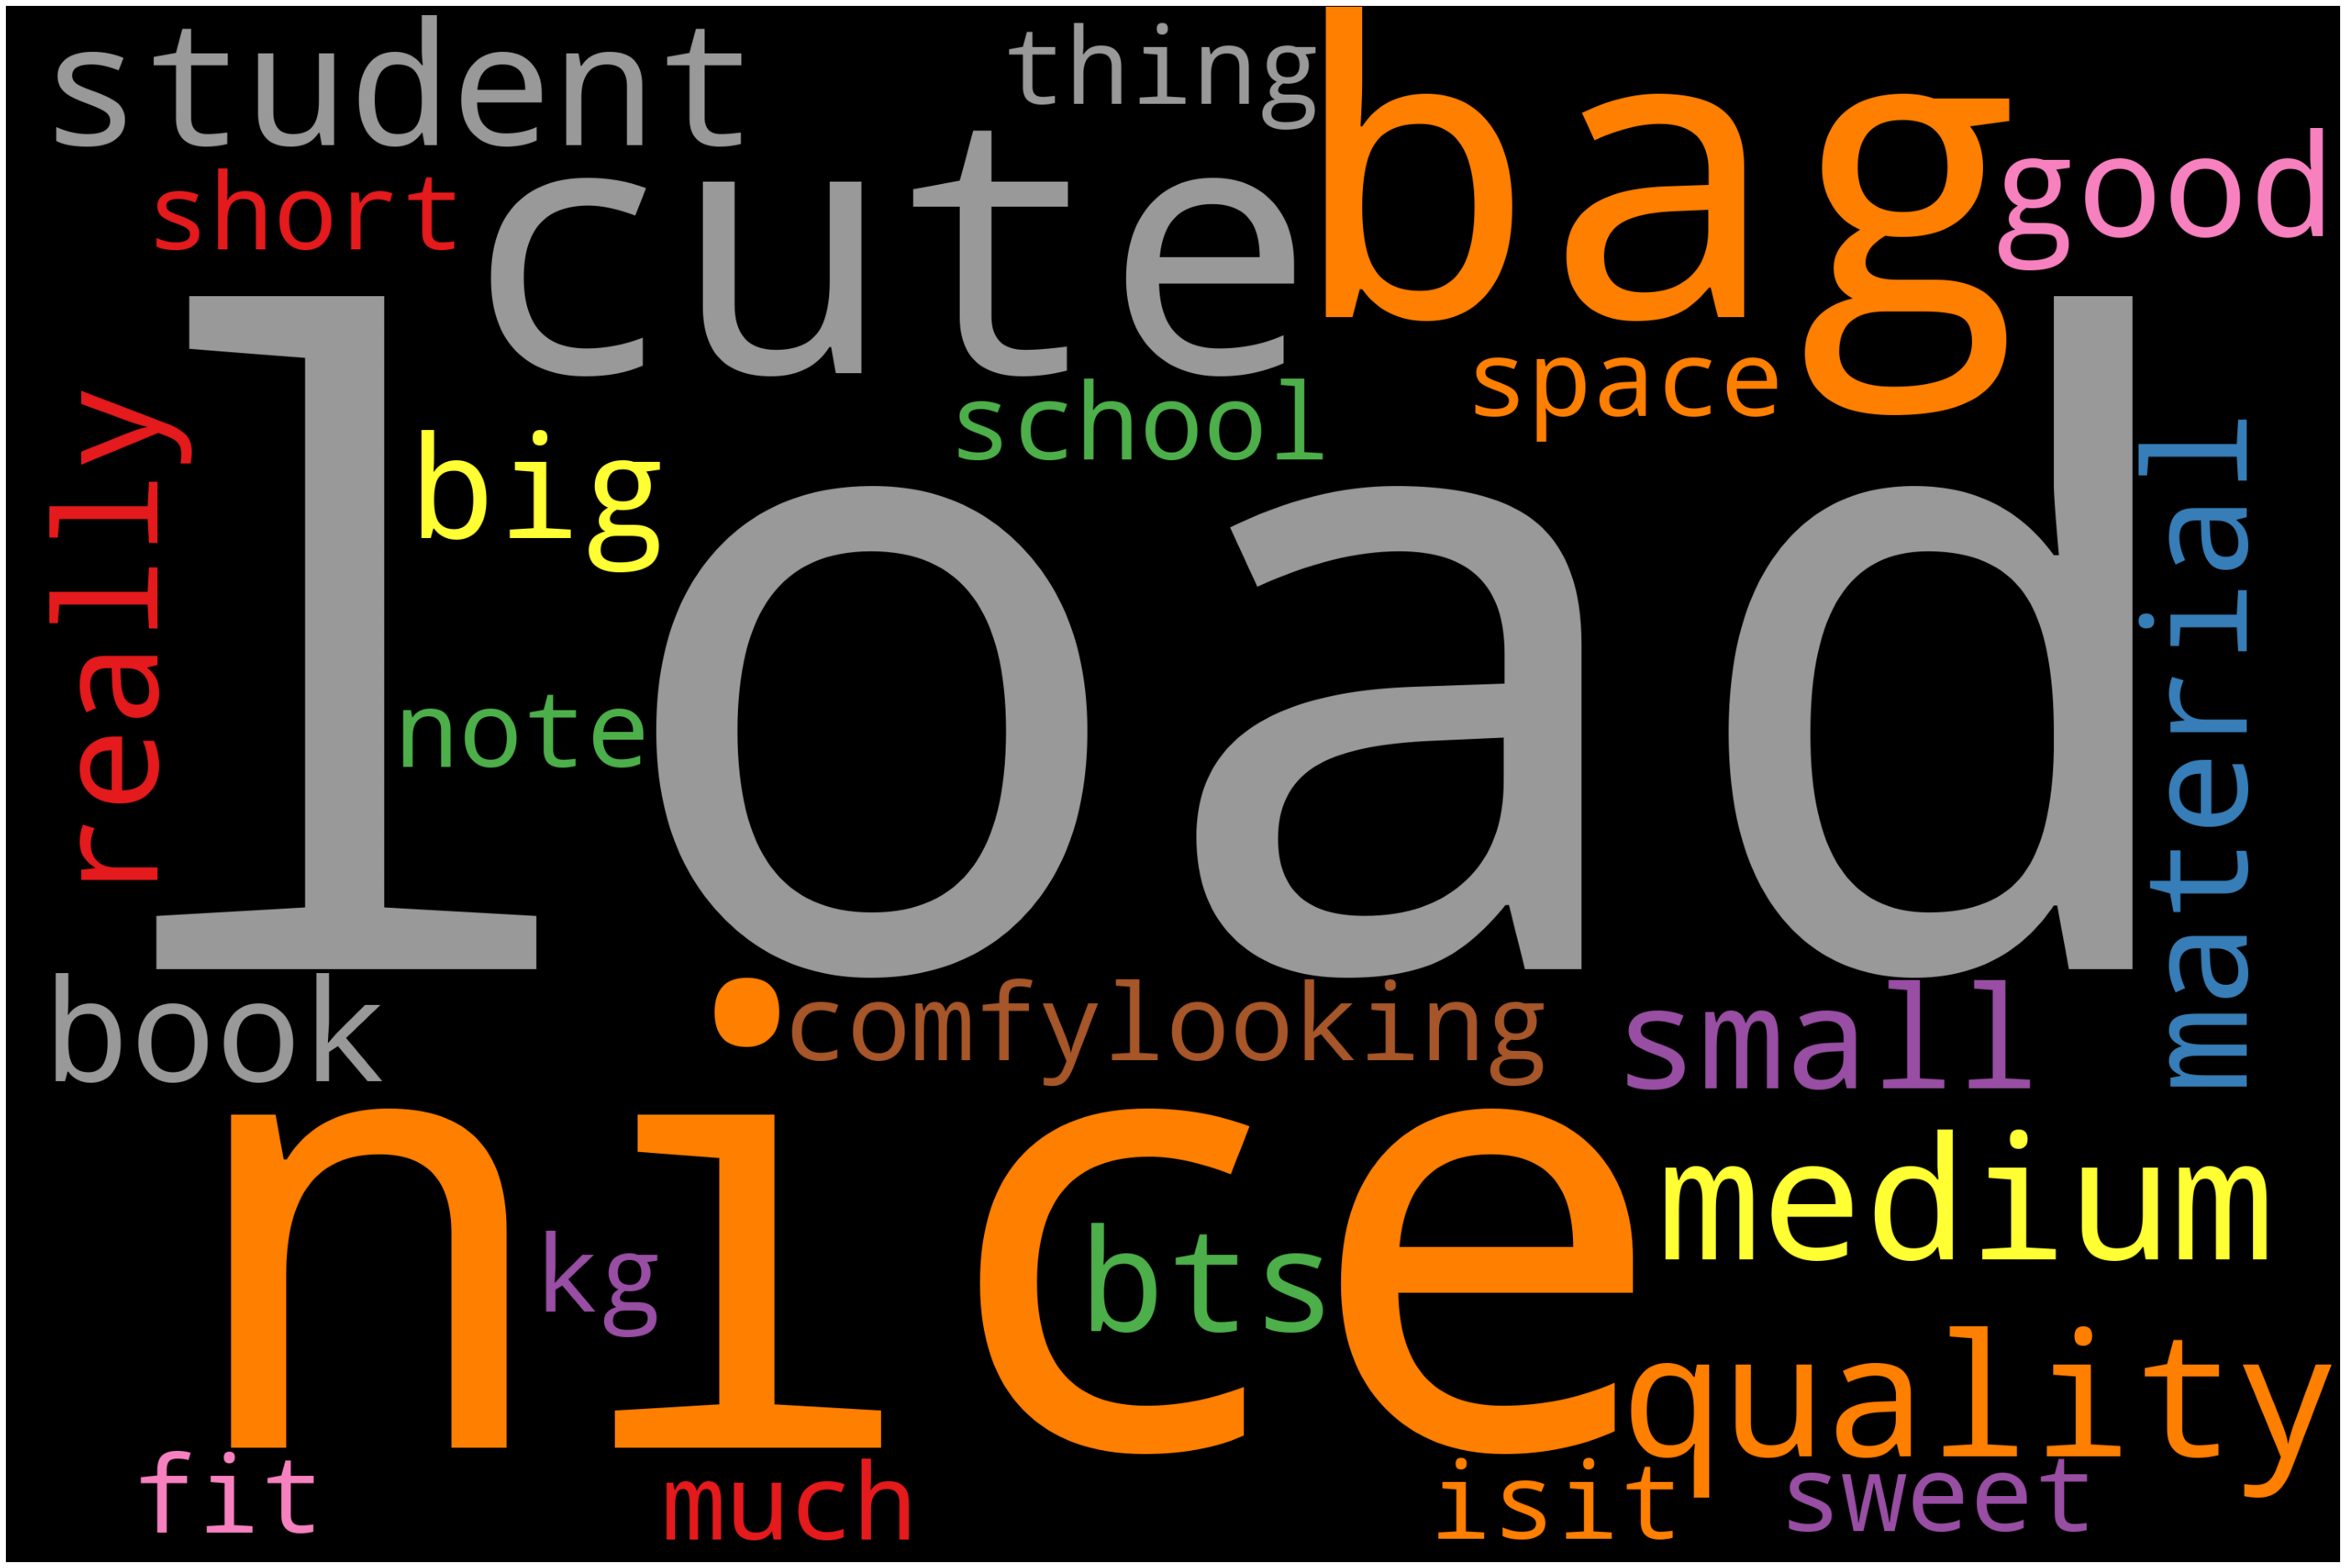

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Define the function to match the word cloud
def plot_cloud(wordcloud):
  plt.figure(figsize=(50,40))
  plt.imshow(wordcloud)
  plt.axis('off')


# Generate word cloud
STOPWORDS.add('pron')
STOPWORDS.add('re')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=25,
                      colormap="Set1",stopwords=STOPWORDS).generate(clean_df)
plot_cloud(wordcloud)

Named Entity Recognition (NER)

In [ ]:
# parts of speech (POS) tagging
one_block=clean_df
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
# filtering the nouns and verbs only
nouns_verb=[token.text for token in doc_block if token.pos_ in ("NOUN","VERB")]
nouns_verb

['quality',
 'medium',
 'load',
 'quality',
 'comfylooking',
 'space',
 'book',
 'thing',
 'isit',
 'student',
 'school',
 'student',
 'load',
 'book',
 'note',
 're',
 'college',
 'student',
 'carry',
 'minimum',
 'amount',
 'material',
 'go',
 'quality',
 'medium',
 'load',
 'damaged',
 'bagquality',
 'medium',
 'load',
 'kid',
 'teenager',
 'bag',
 'cloth',
 'check',
 'size',
 'bag',
 'think',
 'expect',
 'bag',
 'bunny',
 'hear',
 'child',
 'army',
 'buy',
 'thank',
 'amazon',
 'material']

In [ ]:
# Counting the nouns and verb tokens
x= cv.fit_transform(nouns_verb)
sum_words=x.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=["word","count"]
wd_df[0:10]

,word,count
0,load,4
1,quality,3
2,medium,3
3,student,3
4,bag,3
5,book,2
6,material,2
7,comfylooking,1
8,space,1
9,thing,1


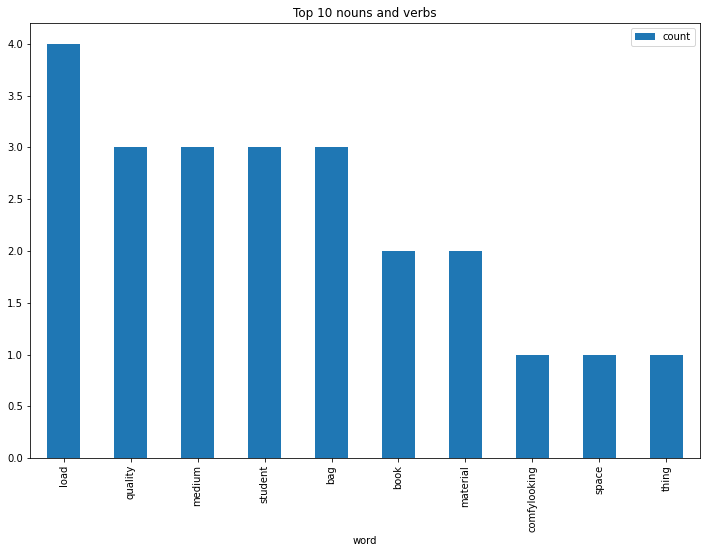

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

Emotion Mining - Sentiment Analysis

In [ ]:
from nltk import tokenize
sentence=tokenize.sent_tokenize(" ".join(df))
sentence

["It's cute and sweet and short.",
 'Quality 3.5/5.',
 'The media could not be loaded.',
 "Quality is good and very comfyLooking cute and small but have much space for big books It's a nice one🙂 but the thing is....it can only fit for kg students not for school students who loaded with books 📚 and notes, but it's perfect for me.",
 "If you're college student , carrying minimum amount of materials then go for it quality is awesome 💜 The media could not be loaded.",
 'Damaged bag,quality also not good The media could not be loaded.',
 "Th8s is beautiful nice for all kids and teenagers i like it I liked the bag cloth it's really so nice but please check the size of the bag.",
 "I thought it will be big but it's kinda smaller than I expected.",
 "Still it's really cute BTS bag with bunny hears My child BTS Army buy it  Waterproof bag thank you Amazon 👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼 Nice material"]

In [ ]:
sent=pd.DataFrame(sentence,columns=["sentence"])
sent

,sentence
0,It's cute and sweet and short.
1,Quality 3.5/5.
2,The media could not be loaded.
3,Quality is good and very comfyLooking cute and...
4,"If you're college student , carrying minimum a..."
5,"Damaged bag,quality also not good The media co..."
6,Th8s is beautiful nice for all kids and teenag...
7,I thought it will be big but it's kinda smalle...
8,Still it's really cute BTS bag with bunny hear...


In [ ]:
from google.colab import files
files.upload()

Saving Afinn.csv to Afinn.csv


{'Afinn.csv': b"word,value\r\nabandon,-2\r\nabandoned,-2\r\nabandons,-2\r\nabducted,-2\r\nabduction,-2\r\nabductions,-2\r\nabhor,-3\r\nabhorred,-3\r\nabhorrent,-3\r\nabhors,-3\r\nabilities,2\r\nability,2\r\naboard,1\r\nabsentee,-1\r\nabsentees,-1\r\nabsolve,2\r\nabsolved,2\r\nabsolves,2\r\nabsolving,2\r\nabsorbed,1\r\nabuse,-3\r\nabused,-3\r\nabuses,-3\r\nabusive,-3\r\naccept,1\r\naccepted,1\r\naccepting,1\r\naccepts,1\r\naccident,-2\r\naccidental,-2\r\naccidentally,-2\r\naccidents,-2\r\naccomplish,2\r\naccomplished,2\r\naccomplishes,2\r\naccusation,-2\r\naccusations,-2\r\naccuse,-2\r\naccused,-2\r\naccuses,-2\r\naccusing,-2\r\nache,-2\r\nachievable,1\r\naching,-2\r\nacquit,2\r\nacquits,2\r\nacquitted,2\r\nacquitting,2\r\nacrimonious,-3\r\nactive,1\r\nadequate,1\r\nadmire,3\r\nadmired,3\r\nadmires,3\r\nadmiring,3\r\nadmit,-1\r\nadmits,-1\r\nadmitted,-1\r\nadmonish,-2\r\nadmonished,-2\r\nadopt,1\r\nadopts,1\r\nadorable,3\r\nadore,3\r\nadored,3\r\nadores,3\r\nadvanced,1\r\nadvantage,2\r\

In [ ]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# manual testing
calculate_sentiment(text='big')

1

In [ ]:
# Calculating sentiment value for each sentence
sent['sentiment_value']=sent['sentence'].apply(calculate_sentiment)
sent['sentiment_value']

0     4
1     0
2     0
3    13
4     4
5     3
6    14
7     1
8     7
Name: sentiment_value, dtype: int64

In [ ]:
# how many words are there in a sentence?
sent['word_count']=sent['sentence'].str.split().apply(len)
sent['word_count']


0     6
1     2
2     6
3    46
4    24
5    11
6    29
7    13
8    23
Name: word_count, dtype: int64

In [ ]:
sent.sort_values(by='sentiment_value')


,sentence,sentiment_value,word_count
1,Quality 3.5/5.,0,2
2,The media could not be loaded.,0,6
7,I thought it will be big but it's kinda smalle...,1,13
5,"Damaged bag,quality also not good The media co...",3,11
0,It's cute and sweet and short.,4,6
4,"If you're college student , carrying minimum a...",4,24
8,Still it's really cute BTS bag with bunny hear...,7,23
3,Quality is good and very comfyLooking cute and...,13,46
6,Th8s is beautiful nice for all kids and teenag...,14,29


In [ ]:
# Sentiment score of the whole review
sent['sentiment_value'].describe()

count     9.000000
mean      5.111111
std       5.254628
min       0.000000
25%       1.000000
50%       4.000000
75%       7.000000
max      14.000000
Name: sentiment_value, dtype: float64

In [ ]:
# negative sentiment score of the whole review
sent[sent['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,Quality 3.5/5.,0,2
2,The media could not be loaded.,0,6


In [ ]:
# positive sentiment score of the whole review
sent[sent['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,It's cute and sweet and short.,4,6
3,Quality is good and very comfyLooking cute and...,13,46
4,"If you're college student , carrying minimum a...",4,24
5,"Damaged bag,quality also not good The media co...",3,11
6,Th8s is beautiful nice for all kids and teenag...,14,29
7,I thought it will be big but it's kinda smalle...,1,13
8,Still it's really cute BTS bag with bunny hear...,7,23


In [ ]:
# Adding index cloumn
sent['index']=range(0,len(sent))
sent

,sentence,sentiment_value,word_count,index
0,It's cute and sweet and short.,4,6,0
1,Quality 3.5/5.,0,2,1
2,The media could not be loaded.,0,6,2
3,Quality is good and very comfyLooking cute and...,13,46,3
4,"If you're college student , carrying minimum a...",4,24,4
5,"Damaged bag,quality also not good The media co...",3,11,5
6,Th8s is beautiful nice for all kids and teenag...,14,29,6
7,I thought it will be big but it's kinda smalle...,1,13,7
8,Still it's really cute BTS bag with bunny hear...,7,23,8


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


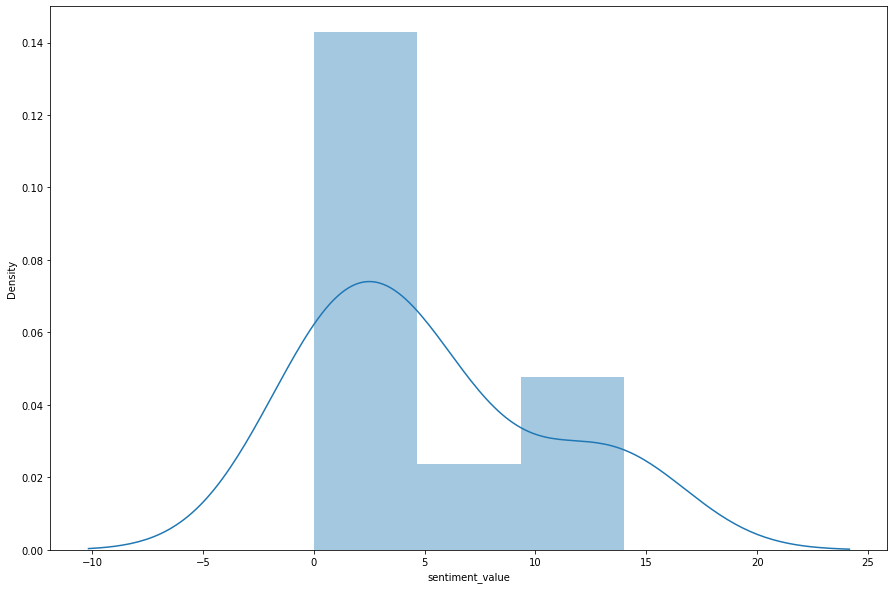

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent['sentiment_value'])


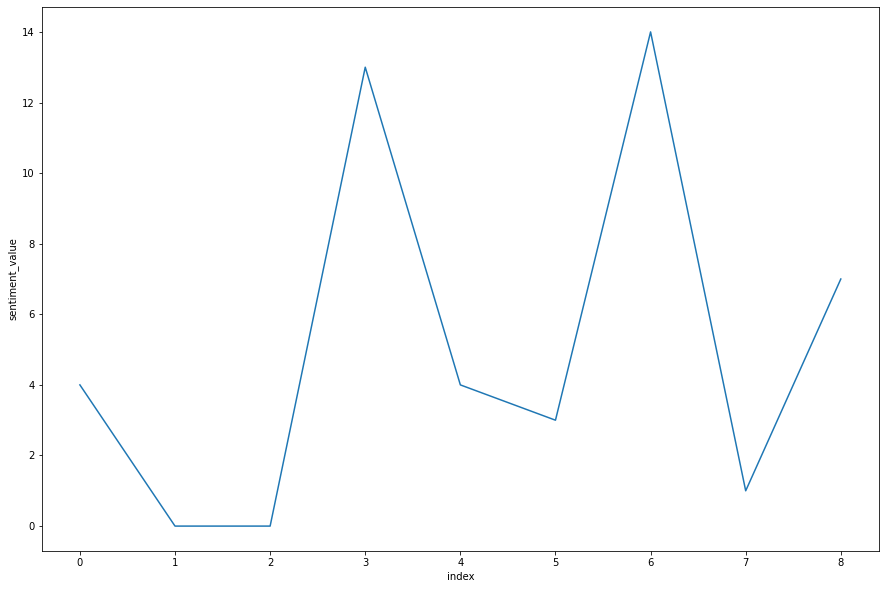

In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent)

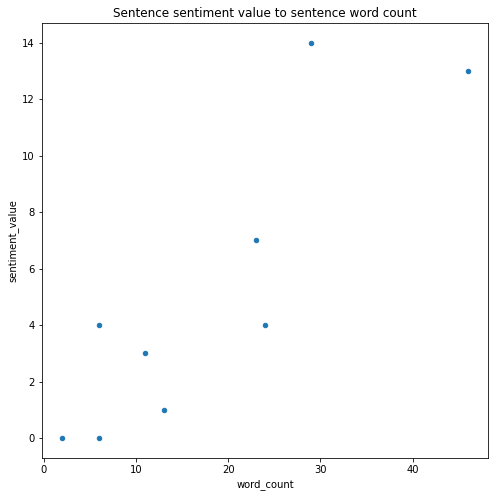

In [ ]:
# Correlation analysis
sent.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')